# ДЗ1
### *виконала студентка групи ФБ-33 Журавльова Марія* ###

Мій набір даних - ***TMDB 10000 Movies Dataset***

Посилання на цей датасет: https://www.kaggle.com/datasets/i0xc0d3x00000/tmdb-10000-movies-dataset

**Про набір даних:** Цей набір даних містить дані про найвищі рейтинги фільмів усіх часів. Дані отримано з API TMDB.

**Розмір:** 10 000 рядків та 8 колонок.

**Опис колонок:**
- title - назва фільму;
- overview - опис сюжету фільму;
- release_date - оригінальна дата випуску;
- vote_average - середній рейтинг фільму;
- vote_count : кількість отриманих голосів;
- original_language - мова зйомки;
- популярність - індекс популярності.

In [91]:
import pandas as pd

# Завантажую данні
df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\university\МТАД\movies-tmdb-10000.csv")
df.head()

,Unnamed: 0,title,overview,release_date,vote_average,vote_count,original_language,popularity
0,0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.7,17537,en,103.429
1,1,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,8.7,23369,en,119.717
2,2,Cuando Sea Joven,70-year-old Malena gets a second chance at lif...,2022-09-14,8.7,208,es,44.971
3,3,"The Boy, the Mole, the Fox and the Horse","The unlikely friendship of a boy, a mole, a fo...",2022-12-25,8.6,241,en,40.793
4,4,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,8.6,10619,en,61.662


- Очистити датасет від викидів, рядків, що не містять значень. 

In [92]:
# Видалення рядків без значень
print("Кількість пропусків:")
print(df.isna().sum())

df_clean = df.dropna()
print("Після видалення пропусків:")
print(df_clean.isna().sum())

Кількість пропусків:
Unnamed: 0           0
title                0
overview             2
release_date         0
vote_average         0
vote_count           0
original_language    0
popularity           0
dtype: int64
Після видалення пропусків:
Unnamed: 0           0
title                0
overview             0
release_date         0
vote_average         0
vote_count           0
original_language    0
popularity           0
dtype: int64


In [93]:
# Видалення викидів
q1 = df_clean['vote_count'].quantile(0.25)
q3 = df_clean['vote_count'].quantile(0.75)
IQR = q3 - q1
low = q1 - 1.5 * IQR
high = q3 + 1.5 * IQR

clean_df = df_clean[(df_clean['vote_count'] >= low) & (df_clean['vote_count'] <= high)]

print("Кількість рядків до фільтрації:", len(df_clean))
print("Кількість після:", len(clean_df))

Кількість рядків до фільтрації: 9998
Кількість після: 8778


In [94]:
# Зберігаю очищений датасет
clean_df.to_csv("movie_tmdb_clean.csv", index=False)

- Порахувати середнє, усічене середнє, медіану, дисперсією, стандартне відхилення, середнє відхидення, абсолютно медіане відхилення. 

In [95]:
from scipy import stats

# Середнє
mean = clean_df['vote_count'].mean()
print("Середнє значення: ", mean)

# Усічене середнє
trimmed_mean = stats.trim_mean(clean_df['vote_count'], 0.1)
print("Усічене середнє: ", trimmed_mean)

# Медіана
median = clean_df['vote_count'].median()
print("Медіана: ", median)

# Дисперсія
variance = clean_df['vote_count'].var(ddof=1)
print("Дисперсія: ", variance)

# Стандартне відхилення
std_dev = clean_df['vote_count'].std(ddof=1)
print("Стандартне відхилення: ", std_dev)

# Середнє відхилення
mean_abs_dev = (clean_df['vote_count'] - mean).abs().mean()
print("Середнє абсолютне відхилення: ", mean_abs_dev)

# Абсолютно медіане відхилення
median_abs_dev = (clean_df['vote_count'] - median).abs().median()
print("Абсолютно медіане відхилення: ", median_abs_dev)

# Збереження результатів у файл
file = open('movie_calculated_values.txt', 'w')
file.write(f"Середнє: {mean}\n")
file.write(f"Усічене середнє: {trimmed_mean}\n")
file.write(f"Медіана: {median}\n")
file.write(f"Дисперсія: {variance}\n")
file.write(f"Стандартне відхилення: {std_dev}\n")
file.write(f"Середнє абсолютне відхилення: {mean_abs_dev}\n")
file.write(f"Абсолютно медіане відхилення: {median_abs_dev}\n")
file.close()

Середнє значення:  808.0672134882661
Усічене середнє:  666.1392369020501
Медіана:  507.0
Дисперсія:  511625.1389249225
Стандартне відхилення:  715.2797626977311
Середнє абсолютне відхилення:  546.3176134582402
Абсолютно медіане відхилення:  255.0


- Нормалізувати дані мін. мах та середня нормалізація. 

In [96]:
df_normal = clean_df.copy()
x = df_normal['vote_count']

# Min-max нормалізація 
df_normal["min_max_normal"] = (x - x.min()) / (x.max() - x.min())

# Середня нормалізація
df_normal["mean_normal"] = (x - x.mean()) / x.std()

# Збереження нормалізованих даних
df_normal[["vote_count", "min_max_normal", "mean_normal"]].to_csv("movie_normalized.csv", index=False)
df_normal[["vote_count", "min_max_normal", "mean_normal"]].head()

,vote_count,min_max_normal,mean_normal
2,208,0.002524,-0.838927
3,241,0.012934,-0.792791
17,291,0.028707,-0.722888
18,2326,0.670662,2.122153
21,2967,0.872871,3.018305


- Намалювати 3 графіки. 

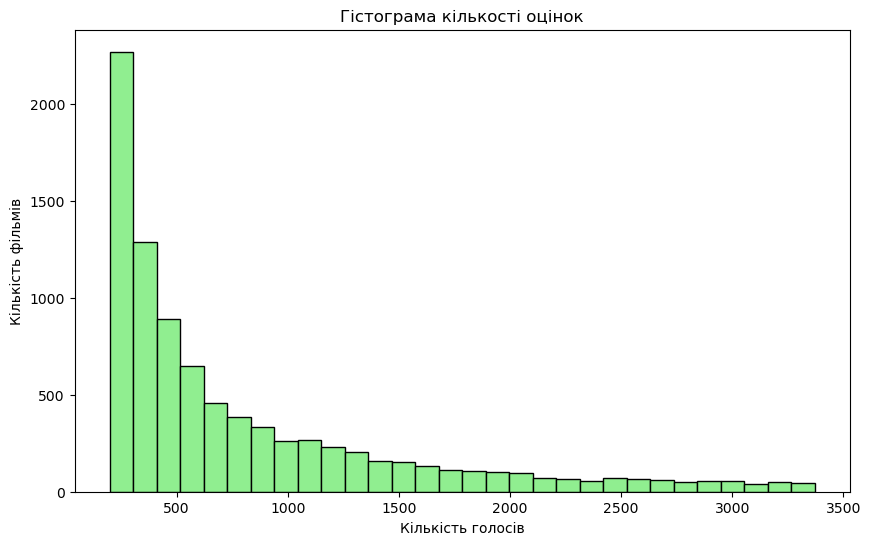

In [97]:
import matplotlib.pyplot as plt

# Гістограма
plt.figure(figsize=(10, 6))
plt.hist(clean_df['vote_count'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Гістограма кількості оцінок')
plt.xlabel('Кількість голосів')
plt.ylabel('Кількість фільмів')
plt.savefig('graph_1.png')
plt.show()

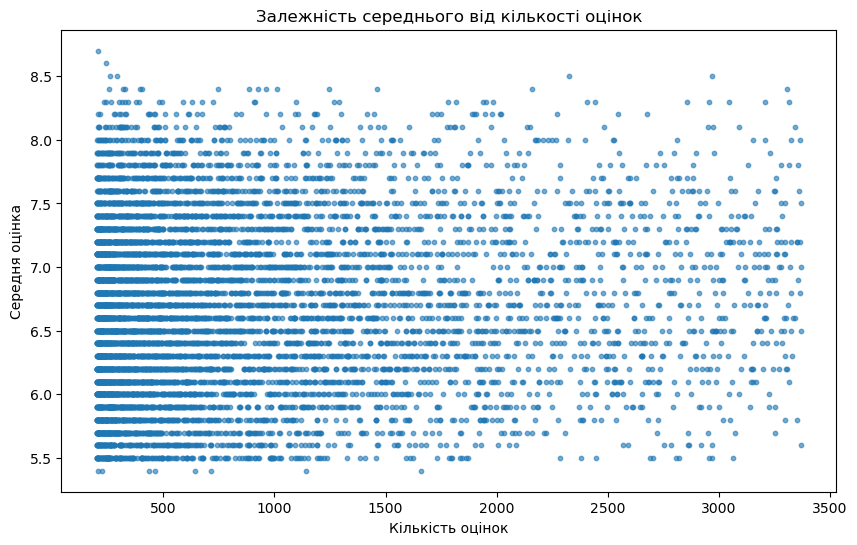

In [98]:
# Графік залежності від середнього
plt.figure(figsize=(10,6))
plt.scatter(clean_df['vote_count'], clean_df['vote_average'], s=10, alpha=0.6)
plt.title('Залежність середнього від кількості оцінок')
plt.xlabel('Кількість оцінок')
plt.ylabel('Середня оцінка')
plt.savefig('graph_2.png')
plt.show()

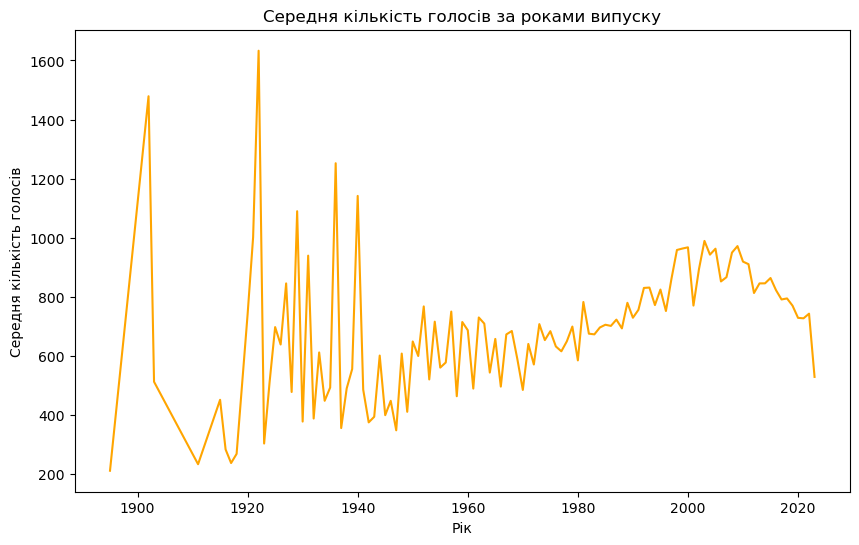

In [99]:
# Середня кількість голосів за роком випуску
df_plt = clean_df.copy()
df_plt['release_year'] = pd.to_datetime(clean_df['release_date']).dt.year
mean_by_year = df_plt.groupby('release_year')['vote_count'].mean()

plt.figure(figsize=(10,6))
mean_by_year.plot(kind='line', color='orange')
plt.title("Середня кількість голосів за роками випуску")
plt.xlabel("Рік")
plt.ylabel("Середня кількість голосів")
plt.savefig('graph_3.png')
plt.show()